# First Euler Case

In [17]:
reset -f

In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [19]:
L, F, x, E, Iz = sp.symbols('L, F, x, E, Iz', real = 'True', positive = 'True')
vL  = sp.symbols('v_L', real = 'True')
Mbz = sp.Function('M_{bz}')
v = sp.Function('v')

## Get internal forces

In [20]:
eq = sp.Eq(0, -Mbz(x) + F*(vL- v(x)))

In [21]:
sol = sp.solve(eq, Mbz(x))
Mbz = sol[0]
Mbz

F*(v_L - v(x))

## Deformation equation

In [22]:
DefEq = sp.Eq(sp.Derivative(v(x),x,x), Mbz/(E*Iz)) 
display(DefEq)

Eq(Derivative(v(x), (x, 2)), F*(v_L - v(x))/(E*Iz))

classifying the equation:
* ordinary 
* linear
* second orden
* inhomogeneous
* constant coefficients

we need an ODE solver-> sp.dsolve()

## Solve the ODE

In [23]:
sol = sp.dsolve(DefEq)
v = sol.rhs
dvdx = sp.diff(sol.rhs, x)
v

C1*sin(sqrt(F)*x/(sqrt(E)*sqrt(Iz))) + C2*cos(sqrt(F)*x/(sqrt(E)*sqrt(Iz))) + v_L

## Boundary conditions to set up equation system

In [24]:
BC1 = sp.Eq(0, v.subs(x,0))
BC2 = sp.Eq(0, dvdx.subs(x, 0))
BC3 = sp.Eq(0, vL - v.subs(x,L))

display(BC1)
display(BC2)
display(BC3)

Eq(0, C2 + v_L)

Eq(0, C1*sqrt(F)/(sqrt(E)*sqrt(Iz)))

Eq(0, -C1*sin(sqrt(F)*L/(sqrt(E)*sqrt(Iz))) - C2*cos(sqrt(F)*L/(sqrt(E)*sqrt(Iz))))

## Coefficient matrix

In [25]:
CoeffMat = sp.Matrix([[BC1.rhs.coeff('C1'), BC1.rhs.coeff('C2'), BC1.rhs.coeff(vL)],
                      [BC2.rhs.coeff('C1'), BC2.rhs.coeff('C2'), BC2.rhs.coeff(vL)],
                      [BC3.rhs.coeff('C1'), BC3.rhs.coeff('C2'), BC3.rhs.coeff(vL)]])
CoeffMat

Matrix([
[                                 0,                                  1, 1],
[        sqrt(F)/(sqrt(E)*sqrt(Iz)),                                  0, 0],
[-sin(sqrt(F)*L/(sqrt(E)*sqrt(Iz))), -cos(sqrt(F)*L/(sqrt(E)*sqrt(Iz))), 0]])

## Determinat of the coefficient matrix

In [30]:
EvEq = sp.Eq(0, CoeffMat.det())
display(EvEq)

False

In [32]:
fun = CoeffMat.det()
fun = fun.subs([(E, 210000), (Iz,  sp.pi/64 * 1**4), (L, 100)])
fun = sp.lambdify(F, fun, 'numpy')

In [33]:
f_vec = np.linspace(0.001,40,1000)

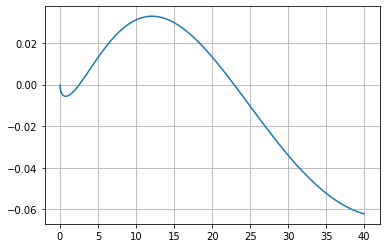

In [34]:
plt.plot(f_vec,fun(f_vec))
plt.grid()

In [35]:
from scipy.optimize import fsolve

In [37]:
sol = fsolve(lambda F: fun(F), 2.5)
sol

array([2.54348363])

In [38]:
(sp.pi**2*210000*sp.pi/64 * 1**4/(4*100**2)).evalf()

2.54348363393084